In [5]:
import sqlite3
import pandas as pd

db = sqlite3.connect('../battelle.db')
DW = pd.read_sql_query("SELECT doc_id,word_id,word_str,word_count FROM docword",db)
D = pd.read_sql_query('SELECT doc_id,doc_label FROM doc',db)
X = pd.merge(D,DW,on='doc_id')

In [48]:
WordsByYear = X[['word_str','doc_label','word_count']].groupby(['doc_label','word_str']).sum()
WordTotals = X[['doc_label','word_count']].groupby(['doc_label']).sum()

In [50]:
for year in WordTotals.index:
    this_year = WordsByYear.loc[year]['word_count'][0]
    total = WordTotals.loc[year][0]
    adj = (this_year / total) * 100
    #print('year',year,'total',total,'this_year',this_year,'adj',adj)
    WordsByYear['adj_word_count'] = adj
WordsByYear1 = WordsByYear.unstack('doc_label').fillna(0)
WBY1 = WordsByYear1['adj_word_count'].T
WBY1

word_str,!,#,$,%,&,','','Candidatus,'Chinese,'S,...,©2012,©2014,©2015,°,±,²,³,³2,¹-¹,á
doc_label,,,,,,,,,,,,,,,,,,,,,
2005,0.000000,0.000682,0.000000,0.000682,0.000682,0.000682,0.000682,0.000000,0.000682,0.000682,...,0.000000,0.000000,0.000000,0.000000,0.000682,0.000000,0.000000,0.000000,0.000682,0.000682
2006,0.000000,0.000682,0.000682,0.000682,0.000682,0.000682,0.000682,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000682,0.000000,0.000000,0.000000,0.000682,0.000682
2007,0.000682,0.000000,0.000000,0.000682,0.000682,0.000682,0.000682,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000682,0.000000,0.000000,0.000682,0.000000,0.000000
2008,0.000000,0.000682,0.000000,0.000682,0.000682,0.000682,0.000682,0.000000,0.000682,0.000682,...,0.000000,0.000000,0.000000,0.000682,0.000682,0.000682,0.000682,0.000000,0.000000,0.000682
2009,0.000682,0.000682,0.000682,0.000682,0.000682,0.000682,0.000682,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000682,0.000682,0.000000,0.000000,0.000000,0.000000,0.000682
2010,0.000682,0.000682,0.000682,0.000682,0.000682,0.000682,0.000682,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000682,0.000682,0.000682,0.000000,0.000000,0.000682,0.000682
2011,0.000682,0.000682,0.000682,0.000682,0.000682,0.000682,0.000682,0.000682,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000682,0.000682,0.000682,0.000682,0.000000,0.000682,0.000000
2012,0.000682,0.000682,0.000682,0.000682,0.000682,0.000682,0.000682,0.000682,0.000682,0.000000,...,0.000682,0.000000,0.000000,0.000000,0.000682,0.000000,0.000000,0.000000,0.000682,0.000682
2013,0.000682,0.000682,0.000682,0.000682,0.000682,0.000682,0.000682,0.000682,0.000000,0.000682,...,0.000000,0.000000,0.000000,0.000682,0.000682,0.000682,0.000682,0.000000,0.000682,0.000682


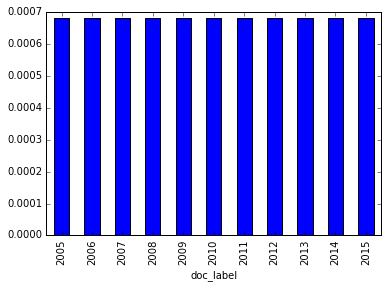

In [52]:
%matplotlib inline
WBY1.loc[:]['Chinese'].plot(kind='bar')